Image dimensions are 815 x 615
Map corner: x: 609, y: 584
Map corner: x: 219, y: 579
Map corner: x: 251, y: 57
Map corner: x: 586, y: 53
Image center is (416.25, 318.25)
Top left (251, 57)
Top Right (586, 53)
Bottom left (219, 579)
Bottom right (609, 584)
Rectified image dimensions are 381 x 600


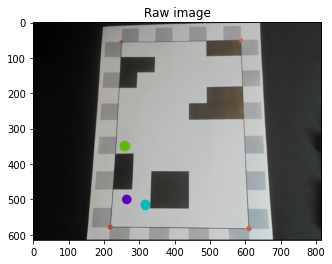

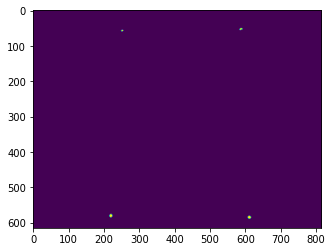

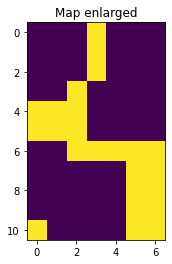

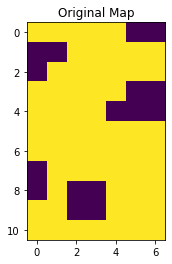

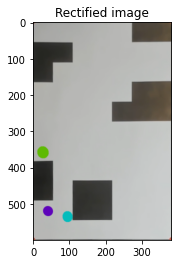

Thymio_pose [1.         9.         3.41739855]
Goal_coords (0, 6)


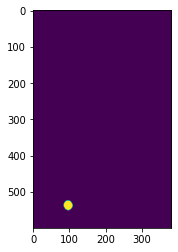

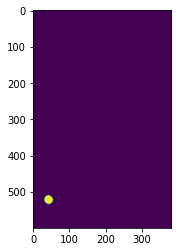

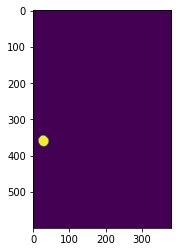

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
import os

import sys  
#sys.path

sys.path.append(r"C:\Users\nelso\AppData\Local\GitHubDesktop\app-2.8.1\BMR-Final-Project\src")
import create_map
import locate_thymio_goal
import img_utils

from create_map import *
from locate_thymio_goal import *
from img_utils import *



filename = 'img/test_points3.png'
img = cv2.imread(filename, cv2.IMREAD_COLOR)

################################################IMG_CORRECTION////////////////////////////////////////////////////

# read image
plt.figure()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Raw image")

# Initialize map
M, rect_width, rect_height, map, map_enlarged, success = create_map(img, 7, 11, verbose = True)
if success:
    plt.figure()
    plt.imshow(map_enlarged, origin = 'lower')
    plt.title("Map enlarged")
    plt.gca().invert_yaxis()
    plt.figure()
    plt.imshow(map, origin = 'lower')
    plt.title("Original Map")
    plt.gca().invert_yaxis()
    # We can now get the rectified image using the warp transform matrix
    # Separating the processes allow us to recalculate quickly the rectified map
    # without having to recalculate the warp transform matrix (assuming fixed camera).
    img_rect = get_rectified_img(img, M, rect_width, rect_height)
    plt.figure()
    plt.imshow(cv2.cvtColor(img_rect, cv2.COLOR_BGR2RGB))
    plt.title("Rectified image")
    plt.show()
else:
    print("Map was not successfully computed.")

[thymio_pose,thymio_found] = locate_thymio_camera(img_rect,'grid', [7,11])
[goal_coords,goal_found] = locate_goal_camera(img_rect,'grid', [7,11])


#hsv = cv2.cvtColor(img_rect, cv2.COLOR_BGR2HSV)
#hsv[270, 70]
#img[270,300]
print("Thymio_pose {}".format(thymio_pose))
print("Goal_coords {}".format(goal_coords))
if(thymio_found == 0):
    print("Thymio not found!")
if(goal_found == 0) :
    print("Goal not found!")


In [4]:
#IMPORTS
import camera
import myThymio
from camera import*
from myThymio import*

from thymio_connection import *
import time

check_vid()

th = connect_to_thymio(num_err = 20, verbose = True)
from thymio_utils import *

#INITIALIZATION
MAP_WIDTH = 815
MAP_HEIGHT = 615
IMPUT_SPEED = 100

set_motor_right_speed(th, 0)
set_motor_left_speed(th, 0)

cam = init_camera(width = MAP_WIDTH, height = MAP_LENGTH)

#TAKE FIRST POS
#img1 = take_picture(cam, video = 0) 
filename = 'img/test_points3.png' #TEST A SUPPRIMER
img1 = cv2.imread(filename, cv2.IMREAD_COLOR)

M, rect_width, rect_height, map, map_enlarged, success = create_map(img, 7, 11, verbose = True)
img_rect = get_rectified_img(img, M, rect_width, rect_height)
[thymio_pose1,thymio_found] = locate_thymio_camera(img_rect,'cartesian', [7,11])

time1 = time.time()
set_motor_right_speed(th, IMPUT_SPEED)
set_motor_left_speed(th, IMPUT_SPEED)

time.sleep(5)
#TAKE SECOND POS
#img2 = take_picture(cam, video = 0) 
filename = 'img/test_points2.png' #TEST A SUPPRIMER
img2 = cv2.imread(filename, cv2.IMREAD_COLOR)

time2 = time.time()
M, rect_width, rect_height, map, map_enlarged, success = create_map(img2, 7, 11, verbose = True)
img_rect2 = get_rectified_img(img2, M, rect_width, rect_height)
[thymio_pose2,thymio_found] = locate_thymio_camera(img_rect2,'cartesian', [7,11])

#SPEED CALCULATION IN PIXELS

distance = math.sqrt(pow(thymio_pose2[0]-thymio_pose1[0],2) + pow(thymio_pose2[1]-thymio_pose1[1],2))
dt = time2-time1
speed = distance/dt

print("Thymio_speed {} pixels/s".format(speed))

#ratio speed(pixel)/speed(input)
ratio = speed/IMPUT_SPEED
print("Speed_ratio (speed(pixel)/speed(input)){}".format(ratio))

ModuleNotFoundError: No module named 'camera'

In [54]:
data = np.array([[1,2,3,4],[1.1,2.4,2.9,5],[0.8,2.3,3.1,4.8]])


#def compute_covariance (data):

nb_datapoints = data.shape[0]
mean_x = sum(data[:,0])/nb_datapoints
mean_y = sum(data[:,1])/nb_datapoints
mean_vx = sum(data[:,2])/nb_datapoints
mean_vy = sum(data[:,3])/nb_datapoints




Cov = np.cov(np.transpose(data))

print(nb_datapoints)
print("mean_X = {}".format(mean_x))
print("mean_Y = {}".format(mean_y))
print("std_x = {}".format(std_x))
print("Covariance = {}".format(Cov))


3
mean_X = 0.9666666666666668
mean_Y = 2.2333333333333334
std_x = 0.12472191289246473
Covariance = [[ 2.33333333e-02  1.66666667e-03 -1.50000000e-02  3.77013235e-17]
 [ 1.66666667e-03  4.33333333e-02 -5.00000000e-03  1.10000000e-01]
 [-1.50000000e-02 -5.00000000e-03  1.00000000e-02 -1.00000000e-02]
 [ 3.77013235e-17  1.10000000e-01 -1.00000000e-02  2.80000000e-01]]
